# PyQT5 Introduction
## Création d’une première fenêtre
Pour créer une première fenêtre, on va utiliser la classe QWidget.

Voici un programme très simple de création d’une fenêtre graphique.

In [ ]:
# importations à faire pour la réalisation d'une interface graphique
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton,QVBoxLayout, QHBoxLayout, QCheckBox, QLabel, QSlider, QLineEdit
from PyQt5.QtCore import Qt


In [ ]:
# Première étape : création d'une application Qt avec QApplication
#    afin d'avoir un fonctionnement correct avec IDLE ou Spyder
#    on vérifie s'il existe déjà une instance de QApplication
app = QApplication.instance() 
if not app: # sinon on crée une instance de QApplication
    app = QApplication(sys.argv)

# création d'une fenêtre avec QWidget dont on place la référence dans fen
fen = QWidget()

# la fenêtre est rendue visible
fen.show()

# exécution de l'application, l'exécution permet de gérer les événements
app.exec_()

### Création d’une première fenêtre

In [ ]:
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

fen = QWidget()

# on donne un titre à la fenêtre
fen.setWindowTitle("Premiere fenetre")

# on fixe la taille de la fenêtre
fen.resize(500,250)

# on fixe la position de la fenêtre
fen.move(300,50)

fen.show()

app.exec_()


### Exemple : Création de deux fenêtres

In [ ]:
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

fen1 = QWidget()
fen1.setWindowTitle("Fenetre 1")
fen1.resize(500,250)
fen1.move(300,50)
fen1.show()

fen2 = QWidget()
fen2.setWindowTitle("Fenetre 2")
fen2.resize(400,300)
fen2.move(200,150)
fen2.show()

app.exec_()

## Création d’une fenêtre personnalisée

Si nous voulons à présent que notre fenêtre dispose d’autres fonctionnalités que celles qui existent dans la classe QWidget, il nous faut créer une classe dérivée pour laquelle nous pourrons ajouter des attributs et des méthodes supplémentaires.

In [ ]:

class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
        self.setWindowTitle("Ma fenetre")

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

## Gestion des événements de la souris dans la fenêtre

Pour interagir avec l’utilisateur, nous allons devoir effectuer de la programmation événementielle. Il va ainsi s’agir de gérer les événements qui seront déclenchés par l’utilisateur (appui sur la souris, etc.).

Nous allons voir comment traiter l’événement que constitue un appui sur un bouton de la souris dans la fenêtre.

### Gestion de l’appui sur un bouton de la souris dans la fenêtre

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
        self.setWindowTitle("Ma fenetre")

    def mousePressEvent(self, event):
        print("appui souris")

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

La méthode mousePressEvent est un gestionnaire d’événement (en anglais, event handler) qui est automatiquement appelé lors de l’appui sur un bouton de la souris. Il nous a donc suffi de redéfinir cette méthode de la classe QWidget et d’y indiquer les instructions à exécuter pour gérer cet événement. Il faut noter que dans sa définition cette méthode doit pouvoir recevoir un argument (nous verrons plus loin l’utilisation de cet argument).

### Liste des gestionnaires d’événements issus de la souris

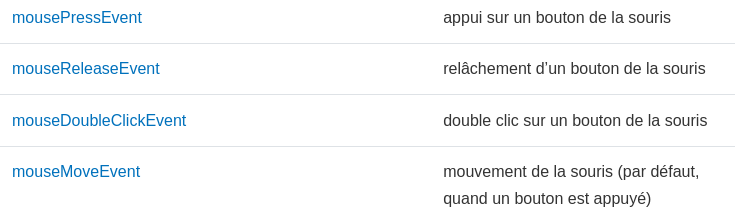

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
        self.setWindowTitle("Ma fenetre")

    def mousePressEvent(self,event):
        if event.button() == Qt.LeftButton:
            print("appui bouton gauche")
        if event.button() == Qt.RightButton:
            print("appui bouton droite")
        if event.button() == Qt.MidButton:
            print("appui bouton du milieu")

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

De même, les coordonnées de la position du curseur de souris au moment de l’appui peuvent être obtenues au moyen des méthodes x et y.

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
        self.setWindowTitle("Ma fenetre")

    def mousePressEvent(self,event):
        if event.button() == Qt.LeftButton:
            print("appui bouton gauche")
            print("position = " + str(event.x()) + " " + str(event.y()))
            
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

## Exercice 1

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
        self.setWindowTitle("Ma fenetre")

    def mousePressEvent(self,event):
        if event.button() == Qt.LeftButton:
        # activation du suivi du mouvement de la souris
            self.setMouseTracking(True)
            print("appui bouton gauche")
        if event.button() == Qt.RightButton:
            self.setMouseTracking(False)
            print("appui bouton droite")
    def mouseMoveEvent(self,event):
        print("position = " + str(event.x()) + " " + str(event.y()))
        
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

Dans le cas du gestionnaire mouseMoveEvent, il est possible d’activer le suivi des mouvements de la souris par la fenêtre même si aucun bouton n’est appuyé. Pour cela, il faut utiliser la méthode setMouseTracking(True) disponible pour la classe QWidget.

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
        self.setWindowTitle("Ma fenetre")

        # activation du suivi du mouvement de la souris
        self.setMouseTracking(True)
        
    def mouseMoveEvent(self,event):
        print("position = " + str(event.x()) + " " + str(event.y()))
            
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

## Création d’un bouton - QPushButton
On crée un bouton en utilisant le constructeur de la classe QPushButton, auquel on communique le texte qu’on souhaite voir figurer à l’intérieur du bouton.

In [14]:

app = QApplication.instance() 
if not app: 
    app = QApplication(sys.argv)

bouton = QPushButton("bouton")
bouton.show()

app.exec_()

0

### La notion de gestionnaire de mise en forme

Un gestionnaire de mise en forme permet de gérer la disposition (en anglais layout) de plusieurs composants. Nous allons ici utiliser un gestionnaire de mise en forme de la classe QVBoxLayout qui permet de positionner les composants les uns sous les autres verticalement. Il possède une méthode addWidget() pour ajouter les composants à gérer. Il faut indiquer à la fenêtre qu’elle doit utiliser ce gestionnaire de mise en forme grâce à la méthode setLayout() de la classe QWidget.

**class QVBoxLayout**

Gestionnaire de mise en forme qui crée une boite (en anglais box) dans laquelle les composants seront disposés les uns sous les autres verticalement. Horizontalement, ils occuperont toute la largeur de la boite.

- Paramètres : text (string) – texte qui sera affiché sur le bouton

**addWidget(composant)**

Ajoute un composant dans le gestionnaire de mise en forme.

- Paramètres : composant – référence du composant à ajouter



In [16]:
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

# creation de la fenetre
fen = QWidget()

# creation du premier bouton
bouton1 = QPushButton("bouton 1")
# creation du deuxieme bouton
bouton2 = QPushButton("bouton 2")

# creation du gestionnaire de mise en forme de type QVBoxLayout
layout = QVBoxLayout()
# ajout du premier bouton au gestionnaire de mise en forme
layout.addWidget(bouton1)
# ajout du deuxieme bouton au gestionnaire de mise en forme
layout.addWidget(bouton2)
# on fixe le QVBoxLayout comme gestionnaire de mise en forme de la fenetre
fen.setLayout(layout)

fen.show()

app.exec_()


0

#### Exemple dans une fenêtre personnalisée

In [17]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)

        # creation du premier bouton
        self.bouton1 = QPushButton("mon premier bouton dans un QVBoxLayout")
        # creation du deuxieme bouton
        self.bouton2 = QPushButton("mon deuxieme bouton dans un QVBoxLayout")
 
        # creation du gestionnaire de mise en forme
        layout = QVBoxLayout()
        # ajout du premier bouton au gestionnaire de mise en forme
        layout.addWidget(self.bouton1)
        # ajout du deuxieme bouton au gestionnaire de mise en forme
        layout.addWidget(self.bouton2)
        # on fixe le gestionnaire de mise en forme de la fenetre
        self.setLayout(layout)

        self.setWindowTitle("Ma fenetre")

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

0

#### Exemple avec positionnement horizontal

In [18]:
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

# creation de la fenetre
fen = QWidget()

# creation du premier bouton
bouton1 = QPushButton("mon premier bouton dans un QHBoxLayout")
# creation du deuxieme bouton
bouton2 = QPushButton("mon deuxieme bouton dans un QHBoxLayout")

# creation du gestionnaire de mise en forme de type QHBoxLayout
layout = QHBoxLayout()
# ajout du premier bouton au gestionnaire de mise en forme
layout.addWidget(bouton1)
# ajout du deuxieme bouton au gestionnaire de mise en forme
layout.addWidget(bouton2)
# on fixe le QHBoxLayout comme gestionnaire de mise en forme de la fenetre
fen.setLayout(layout)

fen.show()

app.exec_()

0

### Gestion du bouton
On va connecter le signal clicked de la classe QPushButton avec l’appel d’une fonction.

In [19]:
def appui_bouton():
    print("Appui sur le bouton")

app = QApplication.instance() 
if not app: 
    app = QApplication(sys.argv)

# creation du bouton
bouton = QPushButton("mon bouton avec une gestion d'appui")
# on connecte le signal "clicked" a la fonction appui_bouton
bouton.clicked.connect(appui_bouton)
# le bouton est rendu visible
bouton.show()

app.exec_()

Appui sur le bouton
Appui sur le bouton
Appui sur le bouton
Appui sur le bouton


0

#### Exemple dans une fenêtre personnalisée

In [20]:

class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
  
        # creation du bouton
        self.bouton = QPushButton("mon bouton avec une gestion d'appui")

        # on connecte le signal "clicked" a la methode appui_bouton
        self.bouton.clicked.connect(self.appui_bouton)
 
        # creation du gestionnaire de mise en forme
        layout = QVBoxLayout()
        layout.addWidget(self.bouton)
        self.setLayout(layout)

        self.setWindowTitle("Ma fenetre")

    def appui_bouton(self):
        print("Appui sur le bouton")

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

Appui sur le bouton
Appui sur le bouton
Appui sur le bouton


0

## Composants graphiques usuels avec Qt 5
Après avoir abordé la gestion d’un composant graphique simple dans la page Premier bouton en Python avec Qt 5, nous allons considérer ici quelques autres composants graphiques usuels : la case à cocher, l”étiquette et le champ de texte.

### Case à cocher - QCheckBox
Une case à cocher permet d’effectuer un choix (coché/non coché) pour une case. Elle est instanciée grâce à la classe QCheckBox.
Présentation

**class QCheckBox(text)**

Case à cocher dont le constructeur reçoit un libellé qui sera affiché à côté de la case pour en préciser le rôle.

Paramètres: text (string) – libellé qui sera affiché à côté de la case

**checkState()**

Renvoie la valeur de l’état de la case

Renvoie: Qt.Checked ou Qt.Unchecked

**setCheckState(state)**

Fixe la valeur de l’état de la case.

Paramètres: state – état à prendre : Qt.Checked ou Qt.Unchecked

In [ ]:
if not app:
    app = QApplication(sys.argv)

# création de la case à cocher
case = QCheckBox("Voici ma premiere case a cocher")

# la case à cocher est rendue visible
case.show()

app.exec_()

### Gestion d’une case à cocher

On peut gérer une case à cocher de 2 façons :

- en gérant une action sur la case

- en cherchant à connaître son état (coché/non coché)

#### Gestion de l’action sur une case à cocher

Chaque action de l’utilisateur sur une case à cocher déclenche un événement de changement d’état. Comme pour un bouton, sauf que cet événement est déclenché chaque fois que l” on coche ou décoche la case.

On va connecter le signal stateChanged de la classe QCheckBox avec l’appel d’une fonction.

In [ ]:
def etat_change():
    print("action sur la case")
    
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

# création de la case à cocher
case = QCheckBox("Voici ma premiere case a cocher")

# on connecte le signal "stateChanged" à la fonction "etat_change"
case.stateChanged.connect(etat_change)

# la case à cocher est rendue visible
case.show()

app.exec_()

#### Etat d’une case à cocher
On peut connaître l'état d’une case à cocher en utilisant la méthode checkState() de la classe QCheckBox. On peut aussi changer l’état de la case en utilisant la méthode setCheckState().

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)
  
        # création de la case à cocher
        self.case = QCheckBox("Voici ma premiere case a cocher")

        # on connecte le signal "stateChanged" à la méthode "etat_change"
        self.case.stateChanged.connect(self.etat_change)
        
        # création du gestionnaire de mise en forme
        layout = QVBoxLayout()
        # ajout de la case à cocher au gestionnaire de mise en forme
        layout.addWidget(self.case)
        # on fixe le gestionnaire de mise en forme de la fenêtre
        self.setLayout(layout)
 
        self.setWindowTitle("Ma fenetre")

    # on définit une méthode à connecter au signal envoyé
    def etat_change(self):
        print("action sur la case")
        if self.case.checkState() == Qt.Checked:
            print("coche")
        else:
            print("decoche") 

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

Il également possible de connaître l’état de la case au travers de l’argument transmis à la fonction qui est appelée.

In [ ]:
def etat_change(etat):
    print("action sur la case")
    if etat == Qt.Checked:
        print("coche")
    else:
        print("decoche") 
    
app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

case = QCheckBox("Voici ma premiere case a  cocher")
case.stateChanged.connect(etat_change)
case.show()

app.exec_()

### Etiquette - QLabel
Une étiquette (en anglais label) est un composant de type QLabel qui permet d’afficher un texte non éditable par l’utilisateur, mais que le programme peut faire évoluer.

Le constructeur de QLabel précise le texte initial.

**class QLabel(text)**

Etiquette dont le constructeur précise le texte initial.

Paramètres:text (string) – texte initial qui sera affiché

**setText(text)**
Modifie le texte de l’étiquette.

Paramètres: text – texte à afficher



In [ ]:

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)

# création de l'étiquette
label = QLabel("Voici mon premier texte avec un QLabel")

# l'étiquette est rendue visible
label.show()

app.exec_()

#### Exemple avec modification du texte

Le programme peut modifier à tout instant le texte d’un QLabel à l’aide de la méthode setText().

In [ ]:
class Fenetre(QWidget):
    def __init__(self):
        QWidget.__init__(self)

        self.n = 0 # attribut pour compter le nombre d'appui sur le bouton
  
        # création du bouton
        self.bouton = QPushButton("mon bouton avec une gestion d'appui")
        # on connecte le signal "clicked" à la méthode "appui_bouton"       
        self.bouton.clicked.connect(self.appui_bouton)
 
        # création de l'étiquette
        self.label = QLabel("appui n = " + str(self.n))
        
        # mise en place du gestionnaire de mise en forme
        layout = QVBoxLayout()
        layout.addWidget(self.bouton)
        layout.addWidget(self.label)
        self.setLayout(layout)
        
        self.setWindowTitle("Ma fenetre")

    # on définit une méthode à connecter au signal envoyé
    def appui_bouton(self):
        # on incrémente l'attribut "n" de 1
        self.n = self.n + 1 
        # on utilise la méthode "setText" de QLabel pour fixer le texte
        self.label.setText("appui n = " + str(self.n))

app = QApplication.instance() 
if not app:
    app = QApplication(sys.argv)
    
fen = Fenetre()
fen.show()

app.exec_()

#### Champ de texte - QLineEdit
Un champ de texte (aussi appelé champ de saisie de texte) est une zone de texte éditable dans laquelle l’utilisateur peut entrer ou modifier un texte. Il s’obtient en instanciant un objet de type QLineEdit.

**class QLineEdit(texte)**

Champ de texte avec un texte initial facultatif.

Paramètres: texte (string) – texte initial qui sera affiché

**text()**

Renvoie de le texte contenu dans le champ de texte.

Renvoie: texte contenu dans le champ de texte
Type renvoyé: string



In [ ]:
if not app:
    app = QApplication(sys.argv)

# création du champ de texte
champ = QLineEdit("Voici mon premier champ de texte")

# le champ de texte est rendu visible
champ.show()

app.exec_()